In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [4]:
test = pd.read_csv('raw_data/test.csv')
train = pd.read_csv('raw_data/train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# PassengerId - unique number - NOT USEFUL - ids are unique
# Survived - label - 0 or 1
# Pclass - category - 1, 2, 3
# Name - string - NOT USEFUL - names are unique
# Sex - category - male / female
# Age - number
# SibSp - number - 0, 1, 2, 3, 4, 5, 8
# Parch - number - 0, 1, 2, 3, 4, 5, 6, 9
# Ticket - string - NOT USEFUL - tickets are unique
# Fare - number
# Cabin - string - NOT USEFUL - cabins are unique
# Embarked - category - C, Q, S

In [5]:
useful_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
category_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [24]:
for column in category_features:
    print(column, train[column].unique(), '\n')

Pclass [3 1 2] 

Sex [1 2] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Embarked [1 2 3 nan] 



In [21]:
train.loc[train['Sex'] == 'male', "Sex"] = 1
train.loc[train['Sex'] == 'female', "Sex"] = 2

In [23]:
train.loc[train['Embarked'] == 'S', "Embarked"] = 1
train.loc[train['Embarked'] == 'C', "Embarked"] = 2
train.loc[train['Embarked'] == 'Q', "Embarked"] = 3

In [16]:
for column in category_features:
    print(column, test[column].unique(), '\n')

Pclass [3 2 1] 

Sex ['male' 'female'] 

SibSp [0 1 2 3 4 5 8] 

Parch [0 1 3 2 4 6 5 9] 

Embarked ['Q' 'S' 'C'] 



In [11]:
for column in useful_features:
    print(column, train[column].isnull().sum())

Pclass 0
Sex 0
Age 177
SibSp 0
Parch 0
Fare 0
Embarked 2


In [12]:
for column in useful_features:
    print(column, test[column].isnull().sum())

Pclass 0
Sex 0
Age 86
SibSp 0
Parch 0
Fare 1
Embarked 0


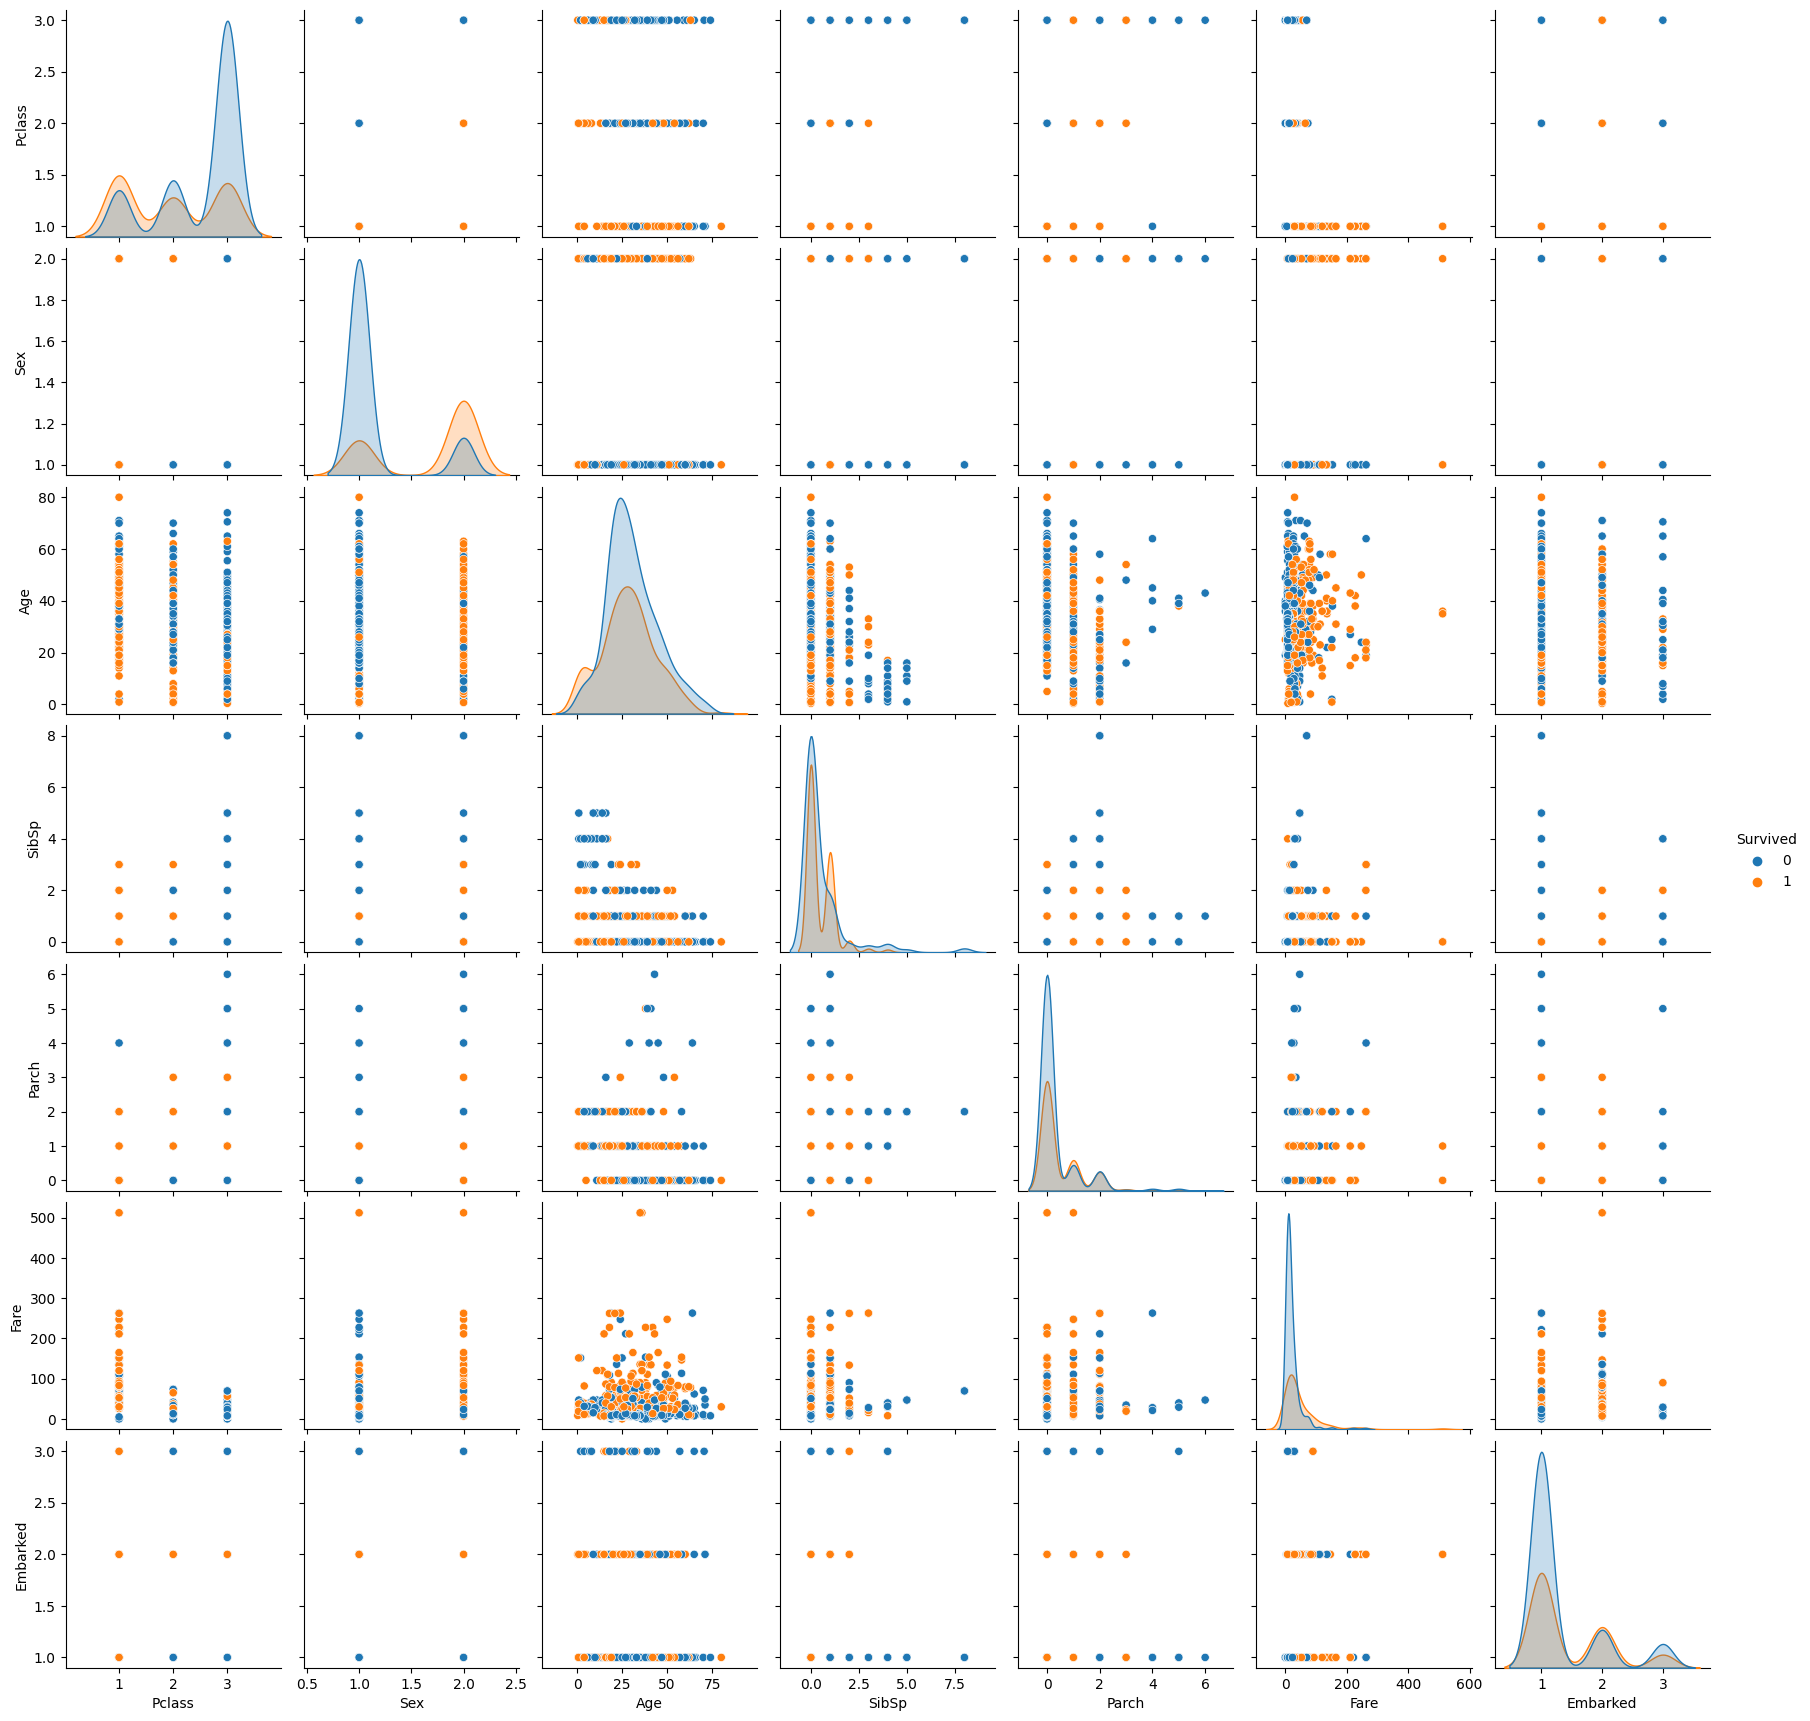

In [25]:
sns.pairplot(train[useful_features], hue='Survived')